In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10 # O nome do dataset possui 10 no final, pois ele possui 10 classes

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten() # Aplica-se o flatten por conta de que os labels estão em um array 2D
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
K = len(set(y_train)) # Número de classes
print("Número de classes:", K)

Número de classes: 10


In [5]:
# Construindo o modelo
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # Um filtro 3x3 reduzirá as imagens pela metade
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) # Note o aumento do número de filtros
x = Flatten()(x) # Camada de planarização
# Camada densa
x = Dropout(0.5)(x) # Dropout para evitar overfitting (Durante as aulas, o autor disse que pode não ser interessante usar dropout em CNNs)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x) # Utilizamos a função softmax para a camada de saída (classificação multiclasse)

model = Model(i, x) # Criando o modelo

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7597 - loss: 0.6730 - val_accuracy: 0.7150 - val_loss: 0.8290
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7733 - loss: 0.6361 - val_accuracy: 0.7208 - val_loss: 0.8165
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7825 - loss: 0.6103 - val_accuracy: 0.7205 - val_loss: 0.8248
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7873 - loss: 0.5908 - val_accuracy: 0.7206 - val_loss: 0.8063
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7954 - loss: 0.5776 - val_accuracy: 0.7259 - val_loss: 0.8131
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7968 - loss: 0.5749 - val_accuracy: 0.7240 - val_loss: 0.8019
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8074 - loss: 0.5472 - val_accuracy: 0.7171 - val_loss: 0.8202
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8042 -

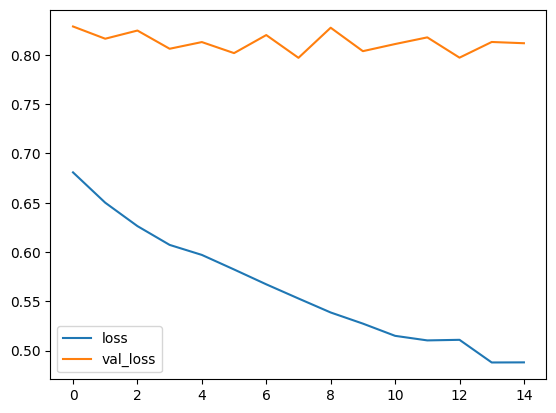

In [8]:
# Visualizando as taxas de erro por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

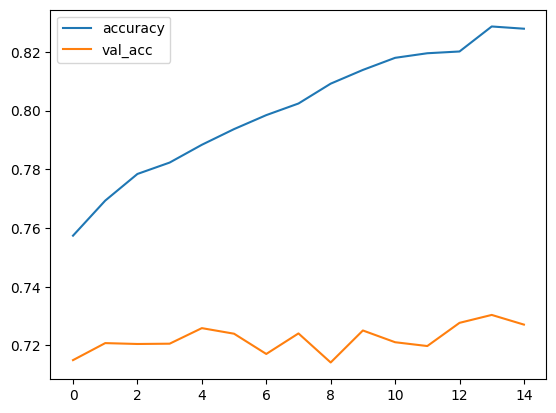

In [9]:
# Visualizando as taxas de erro e acurácia
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix, without normalization
[[768  17  41  19  22   7  13   9  76  28]
 [ 17 847  11   7   3   9  15   4  26  61]
 [ 50   1 564  80 117  82  56  25  16   9]
 [ 25   6  61 517  55 221  62  31  13   9]
 [ 13   4  50  56 716  53  43  51  11   3]
 [ 10   2  31 169  51 674  21  33   4   5]
 [  6   5  28  66  37  39 805   5   7   2]
 [ 20   2  27  36  52  92   7 754   2   8]
 [ 65  26  10  10  10  11   3   4 841  20]
 [ 30  78   8  15   9  14  10  16  35 785]]


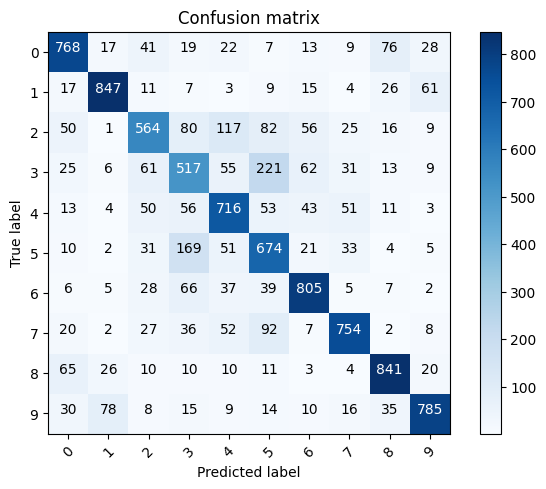

In [10]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, # Matriz de confusão
                          classes, # Classes
                          normalize=False, # Normalização
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues # Cor
                          ):
    # Normalização da matriz (nesse caso não será normalizada por conta do parametro)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    # Plotagem da matriz de confusão
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # Imagem da matriz de confusão
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) # Marcas
    plt.xticks(tick_marks, classes, rotation=45) # Rótulos do eixo x com rotação
    plt.yticks(tick_marks, classes) # Rótulos do eixo y
    
    # Formatação dos números
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2. # Limiar para a cor do texto
    # Adicionando texto na matriz de confusão
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
    
    # Adicionando rótulos
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Fazendo a predição
p_test = model.predict(x_test).argmax(axis=1)
# gerando a matriz de confusão
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))